In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
from scipy.stats.kde import gaussian_kde
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

def ridgeline(data, overlap=0, fill=True, labels=None, n_points=150):
    """
    Creates a standard ridgeline plot.

    data, list of lists.
    overlap, overlap between distributions. 1 max overlap, 0 no overlap.
    fill, matplotlib color to fill the distributions.
    n_points, number of points to evaluate each distribution function.
    labels, values to place on the y axis to describe the distributions.
    """
    if overlap > 1 or overlap < 0:
        raise ValueError('overlap must be in [0 1]')
    xx = np.linspace(np.min(np.concatenate(data)),
                     np.max(np.concatenate(data)), n_points)
    curves = []
    ys = []
    for i, d in enumerate(data):
        pdf = gaussian_kde(d)
        y = i*(1.0-overlap)
        ys.append(y)
        curve = pdf(xx)
        if fill:
            plt.fill_between(xx, np.ones(n_points)*y, 
                             curve+y, zorder=len(data)-i+1, color=fill)
        plt.plot(xx, curve+y, c='k', zorder=len(data)-i+1)
    if labels:
        plt.yticks(ys, labels)

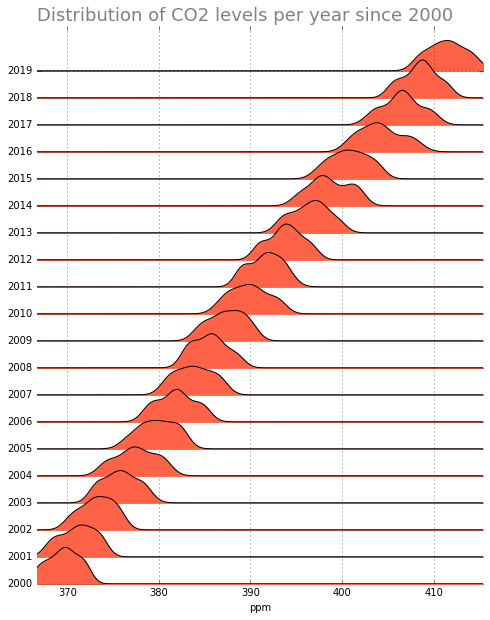

In [5]:
data_url = 'ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_weekly_mlo.txt'
co2_data = pd.read_csv(data_url, sep='\s+', comment='#', na_values=-999.99,
                       names=['year', 'month', 'day', 'decimal', 'ppm', 
                       'days', '1_yr_ago',  '10_yr_ago', 'since_1800'])
                       
co2_data = co2_data[co2_data.year >= 2000]
co2_data = co2_data[co2_data.year != 2020]

plt.figure(figsize = (8, 10))

grouped = [(y, g.ppm.dropna().values) for y, g in co2_data.groupby('year')]

years, data = zip(*grouped)

ridgeline(data, labels=years, overlap=.85, fill='tomato')


plt.title('Distribution of CO2 levels per year since 2000',
          loc='left', fontsize=18, color='gray')
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('ppm')
plt.xlim((co2_data.ppm.min(), co2_data.ppm.max()))
plt.ylim((0, 3.1))
plt.grid(zorder=0)
plt.show()